**Desarrollo de la Regresión Lineal**

**Pasos de la Actividad**

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

**1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [4]:
#Cargamos las librerias 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
Data = pd.read_csv('C:\\Users\\MARTINELIASLOPEZPERE\\Documents\\ANÁLISIS DE DATOS\\Nueva carpeta\\heart_cleveland_upload.csv',encoding='cp1252',)

In [13]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(10)

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,pendiente,ca,thal,condición
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [14]:
# Descripción de los datos
Data.describe()

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,pendiente,ca,thal,condición
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

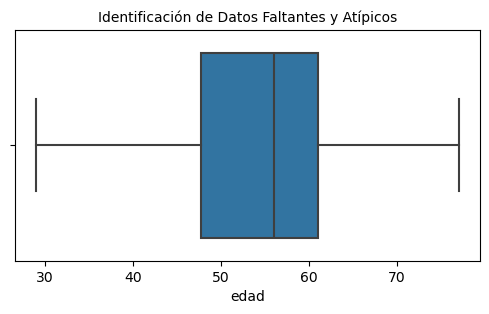

In [27]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['edad'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [20]:
#Revisión de datos faltantes en las columnas que no pueden estar en 0

print("Cantidad de Registros con cero en edad: ",Data['edad'].isin([0]).sum())
print("Cantidad de Registros con cero en presión arterial (trestbps): ",Data['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en colesterol (chol): ",Data['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en frecuencia cardíaca (thalach): ",Data['thalach'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en presión arterial (trestbps):  0
Cantidad de Registros con cero en colesterol (chol):  0
Cantidad de Registros con cero en frecuencia cardíaca (thalach):  0


In [21]:
#Conteo de Datos Atípicos para presión arterial (trestbps)

nivel_minimo=70
nivel_maximo=180
Total_Atipicos=((Data['trestbps']<nivel_minimo)|(Data['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [22]:
# Filtra Datos Atípicos

Data=Data[(Data['trestbps']<nivel_maximo)&(Data['trestbps']>nivel_minimo)]

In [24]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Data['trestbps']<nivel_minimo)|(Data['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


**2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario**

In [30]:
#Revisión del tipo de datos y datos faltantes

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       292 non-null    int64  
 1   sexo       292 non-null    int64  
 2   cp         292 non-null    int64  
 3   trestbps   292 non-null    int64  
 4   chol       292 non-null    int64  
 5   fbs        292 non-null    int64  
 6   restecg    292 non-null    int64  
 7   thalach    292 non-null    int64  
 8   exang      292 non-null    int64  
 9   oldpeak    292 non-null    float64
 10  pendiente  292 non-null    int64  
 11  ca         292 non-null    int64  
 12  thal       292 non-null    int64  
 13  condición  292 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.2 KB


**3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características**

In [31]:
# Total de personas con presencia de enfermedad cardíaca

Data['condición'].value_counts()

condición
0    159
1    133
Name: count, dtype: int64

In [32]:
Data[['condición']].head(10)

,condición
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


**4.Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [33]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables M y Y para almacenar la información del entrenamiento

M = Data.drop('condición',axis=1) # Se cargan los datos de train sin los datos de la columna condición
Y = Data['condición'] # Se cargan los datos de train con los datos de la columna condición

M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.25, stratify=Y, random_state= 0)

In [34]:
print (M_train)

     edad  sexo  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
268    48     1   3       122   222    0        2      186      0      0.0   
53     48     1   1       130   245    0        2      180      0      0.2   
208    59     1   3       110   239    0        2      142      1      1.2   
74     70     1   2       160   269    0        0      112      1      2.9   
290    41     1   3       110   172    0        2      158      0      0.0   
..    ...   ...  ..       ...   ...  ...      ...      ...    ...      ...   
227    57     1   3       110   201    0        0      126      1      1.5   
281    44     1   3       110   197    0        2      177      0      0.0   
205    60     0   3       158   305    0        2      161      0      0.0   
213    58     1   3       114   318    0        1      140      0      4.4   
113    54     0   2       160   201    0        0      163      0      0.0   

     pendiente  ca  thal  
268          0   0     0  
53       

In [35]:
print (Y_train)

268    0
53     0
208    1
74     1
290    1
      ..
227    0
281    1
205    1
213    1
113    0
Name: condición, Length: 219, dtype: int64


**5.Entrenar el modelo configurando los diferentes hiperparámetros**

In [36]:
# Construimos el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (M_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(M_test) 

In [37]:
print (Y_test)

111    0
257    1
51     0
272    0
39     0
      ..
169    0
270    1
137    0
155    1
164    1
Name: condición, Length: 73, dtype: int64


In [38]:
print (Prediccion)

[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1]


**6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [39]:
# Comprobamos el desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.86        33

    accuracy                           0.88        73
   macro avg       0.88      0.87      0.88        73
weighted avg       0.88      0.88      0.88        73



**7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

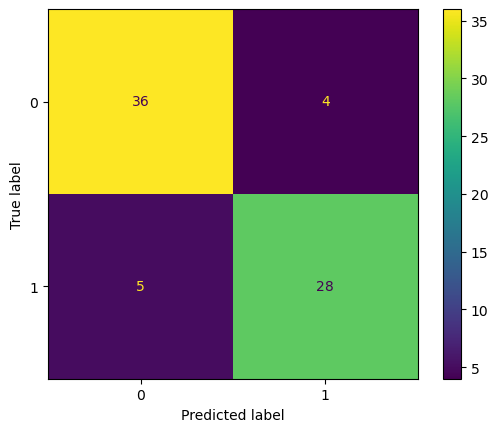

In [40]:
# Se procede a crear una matrix de confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

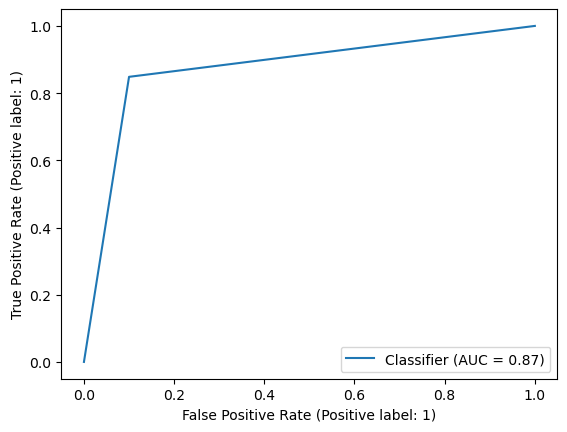

In [41]:
# Creamos una curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

**8. Interpretar, analizar y documentar los resultados obtenidos**

Del desempeño del modelo se puede describir:

Precisión: La precisión para la clase "condición" es de 0.88, lo que significa que el 88% de las predicciones positivas realizadas por el modelo para esta clase fueron correctas.

Recall: El recall para la clase "condición" es de 0.85, lo que significa que el modelo identificó correctamente al 85% de todos los enfermos cardíacos. 

F1 Score: El F1 Score para la clase "condición" es de 0.86, lo que indica un equilibrio entre precisión y recall. El F1 Score es una medida que combina la precisión y el recall en una sola métrica, y un valor de 0.86 indica que el modelo tiene un buen desempeño en ambos aspectos.

De la matriz de confusión podemos interpretar:

Por medio de la matriz de confusión se logra interpretar que en el recuadro amarillo esta el numero 36, que significa que 36 veces el algoritmo predijo que la persona no tenia la presencia de enfermedad cardíaca y en efecto no presentaba la enfermedad cardíaca.
por otra parte donde esta el numero 28 en el recuadro verde, significa que 28 veces el algoritmo predijo que la persona presentaba enfermedad cardíaca y en efecto 28 presentaban enfermedad cardíaca.
Donde esta el 5 en el recuadro violeta se predijo que 5 personas no presentaban la enfermedad cardíaca. Pero en realidad era que 5 personas si presentaban la enfermedad cardíaca.
Finalmente donde esta el 4 en el recuadro violeta se predijo que 4 personas presentaban la enfermedad cardíaca. Pero en realidad era que 4 personas no presentaban la enfermedad cardíaca.

De la curva de precisión del modelo se puede interpretar:

El (AUC) es de 0.87, lo que significa que el modelo es capaz de distinguir correctamente entre los casos positivos y negativos con un alto grado de precisión. Sin embargo, es importante tener en cuenta que la precisión del modelo puede variar en función del umbral de clasificación específico que se utilice.